In [27]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


In [28]:
# Load the dataset
file_path = "data2.xlsx"  # Replace with your dataset path
df = pd.read_excel(file_path)

In [29]:
# Inspect the dataset
print("Dataset preview:")
print(df.head())

Dataset preview:
   Year  GEOID  STATEID           COUNTY  COUNTYID  TOT_POP  NHSP_POP  \
0  2014  17023       17     Clark County         1    16353     16172   
1  2014  17025       17      Clay County         2    13828     13767   
2  2014  17027       17   Clinton County         3    37793     36744   
3  2014  17029       17     Coles County         4    53683     52520   
4  2014  17033       17  Crawford County         5    19777     19406   

   HSP_POP  WHT_NHSP  BLK_NHSP  ...  TOT_CVAP  BPV_CVAP  APV_CVAP  \
0      181     15926        64  ...     12480      2574      9914   
1       61     13404        86  ...     10530      1735      8774   
2     1049     34797      1286  ...     29090      3043     26812   
3     1163     49208      1963  ...     43410      9480     33683   
4      371     18175       569  ...     15535      2195     13523   

   TOT_VOT_REG  CREP_TOT_VOTE  CDEM_TOT_VOTE     CWINNER  PDEM_TOT_VOT  \
0         3964            645           2457  Democrati

In [30]:
df.describe()

,Year,GEOID,STATEID,COUNTYID,TOT_POP,NHSP_POP,HSP_POP,WHT_NHSP,BLK_NHSP,AIA_NHSP,...,MALE_POP,FEMALE_POP,TOT_CVAP,BPV_CVAP,APV_CVAP,TOT_VOT_REG,CREP_TOT_VOTE,CDEM_TOT_VOTE,PDEM_TOT_VOT,PREP_TOT_VOT
count,208.000000,208.000000,208.0,208.000000,208.0000,208.000000,208.00000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,2018.605769,17104.423077,17.0,15.408654,30342.5000,29354.000000,988.50000,25290.403846,3687.177885,170.067308,...,14286.894231,11162.822115,19808.283654,3011.879808,16577.620192,11570.759615,2792.254808,3040.100962,2064.903846,3827.504808
std,2.604041,58.523325,0.0,8.667298,46295.0898,44275.489871,2116.21767,30496.263473,13900.487030,359.403041,...,20568.139792,20988.885408,30976.086279,3395.045738,28509.224823,23827.796503,4511.639774,4248.742050,7863.202439,7859.925849
min,2014.000000,17023.000000,17.0,1.000000,3649.0000,3466.000000,0.00000,3249.000000,6.000000,0.000000,...,1811.000000,180.000000,1633.000000,339.000000,-4497.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17049.000000,17.0,8.000000,10857.7500,10731.250000,157.25000,10468.750000,72.000000,22.750000,...,5392.750000,2014.250000,5799.000000,1070.750000,4062.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,17087.000000,17.0,15.000000,16301.5000,15902.500000,433.50000,15455.000000,579.000000,66.000000,...,8087.500000,5893.500000,11555.000000,1883.500000,9251.000000,5571.500000,848.000000,1534.000000,0.000000,0.000000
75%,2021.000000,17157.000000,17.0,23.000000,34775.2500,33909.250000,939.50000,32904.500000,1680.250000,172.500000,...,17331.750000,12164.500000,25008.750000,3167.250000,18020.750000,12401.000000,3896.250000,4116.500000,1281.250000,5030.500000
max,2022.000000,17199.000000,17.0,30.000000,268873.0000,260031.000000,17392.00000,169352.000000,80973.000000,2325.000000,...,127237.000000,136226.000000,198690.000000,22215.000000,192333.000000,197310.000000,29091.000000,25600.000000,68325.000000,57150.000000


In [31]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Year             0
GEOID            0
STATEID          0
COUNTY           0
COUNTYID         0
TOT_POP          0
NHSP_POP         0
HSP_POP          0
WHT_NHSP         0
BLK_NHSP         0
AIA_NHSP         0
ASN_NHSP         0
MEDN_INC         0
MALE_POP         0
FEMALE_POP       0
TOT_CVAP         0
BPV_CVAP         0
APV_CVAP         0
TOT_VOT_REG      0
CREP_TOT_VOTE    0
CDEM_TOT_VOTE    0
CWINNER          0
PDEM_TOT_VOT     0
PREP_TOT_VOT     0
PWINNER          0
dtype: int64


# EDA

In [32]:
# Summary of Race Statistics
race_col = ['NHSP_POP', 'HSP_POP', 'WHT_NHSP', 'BLK_NHSP', 'AIA_NHSP', 'ASN_NHSP']
df_subset = df[race_col]
summary = df_subset.describe()

# Display the summary
print(summary)

# Additional calculations
for column in race_col:
    print(f"Summary for {column}:")
    print(f"  Mean: {df[column].mean()}")
    print(f"  Median: {df[column].median()}")
    print(f"  Mode: {df[column].mode()[0]}")
    print(f"  Standard Deviation: {df[column].std()}")
    print(f"  Min: {df[column].min()}")
    print(f"  Max: {df[column].max()}")
    print(f"  Skewness: {df[column].skew()}")
    print(f"  Kurtosis: {df[column].kurtosis()}")
    print()


            NHSP_POP      HSP_POP       WHT_NHSP      BLK_NHSP     AIA_NHSP  \
count     208.000000    208.00000     208.000000    208.000000   208.000000   
mean    29354.000000    988.50000   25290.403846   3687.177885   170.067308   
std     44275.489871   2116.21767   30496.263473  13900.487030   359.403041   
min      3466.000000      0.00000    3249.000000      6.000000     0.000000   
25%     10731.250000    157.25000   10468.750000     72.000000    22.750000   
50%     15902.500000    433.50000   15455.000000    579.000000    66.000000   
75%     33909.250000    939.50000   32904.500000   1680.250000   172.500000   
max    260031.000000  17392.00000  169352.000000  80973.000000  2325.000000   

          ASN_NHSP  
count   208.000000  
mean    422.322115  
std     994.883712  
min       0.000000  
25%      48.500000  
50%     115.500000  
75%     287.500000  
max    6002.000000  
Summary for NHSP_POP:
  Mean: 29354.0
  Median: 15902.5
  Mode: 4293
  Standard Deviation: 44275.48

<ipython-input-33-e7f138b68516>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population_Category'] = pd.cut(df[race], bins=[0, low_threshold, high_threshold, df[race].max()],
<ipython-input-33-e7f138b68516>:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-33-e7f138b68516>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Population

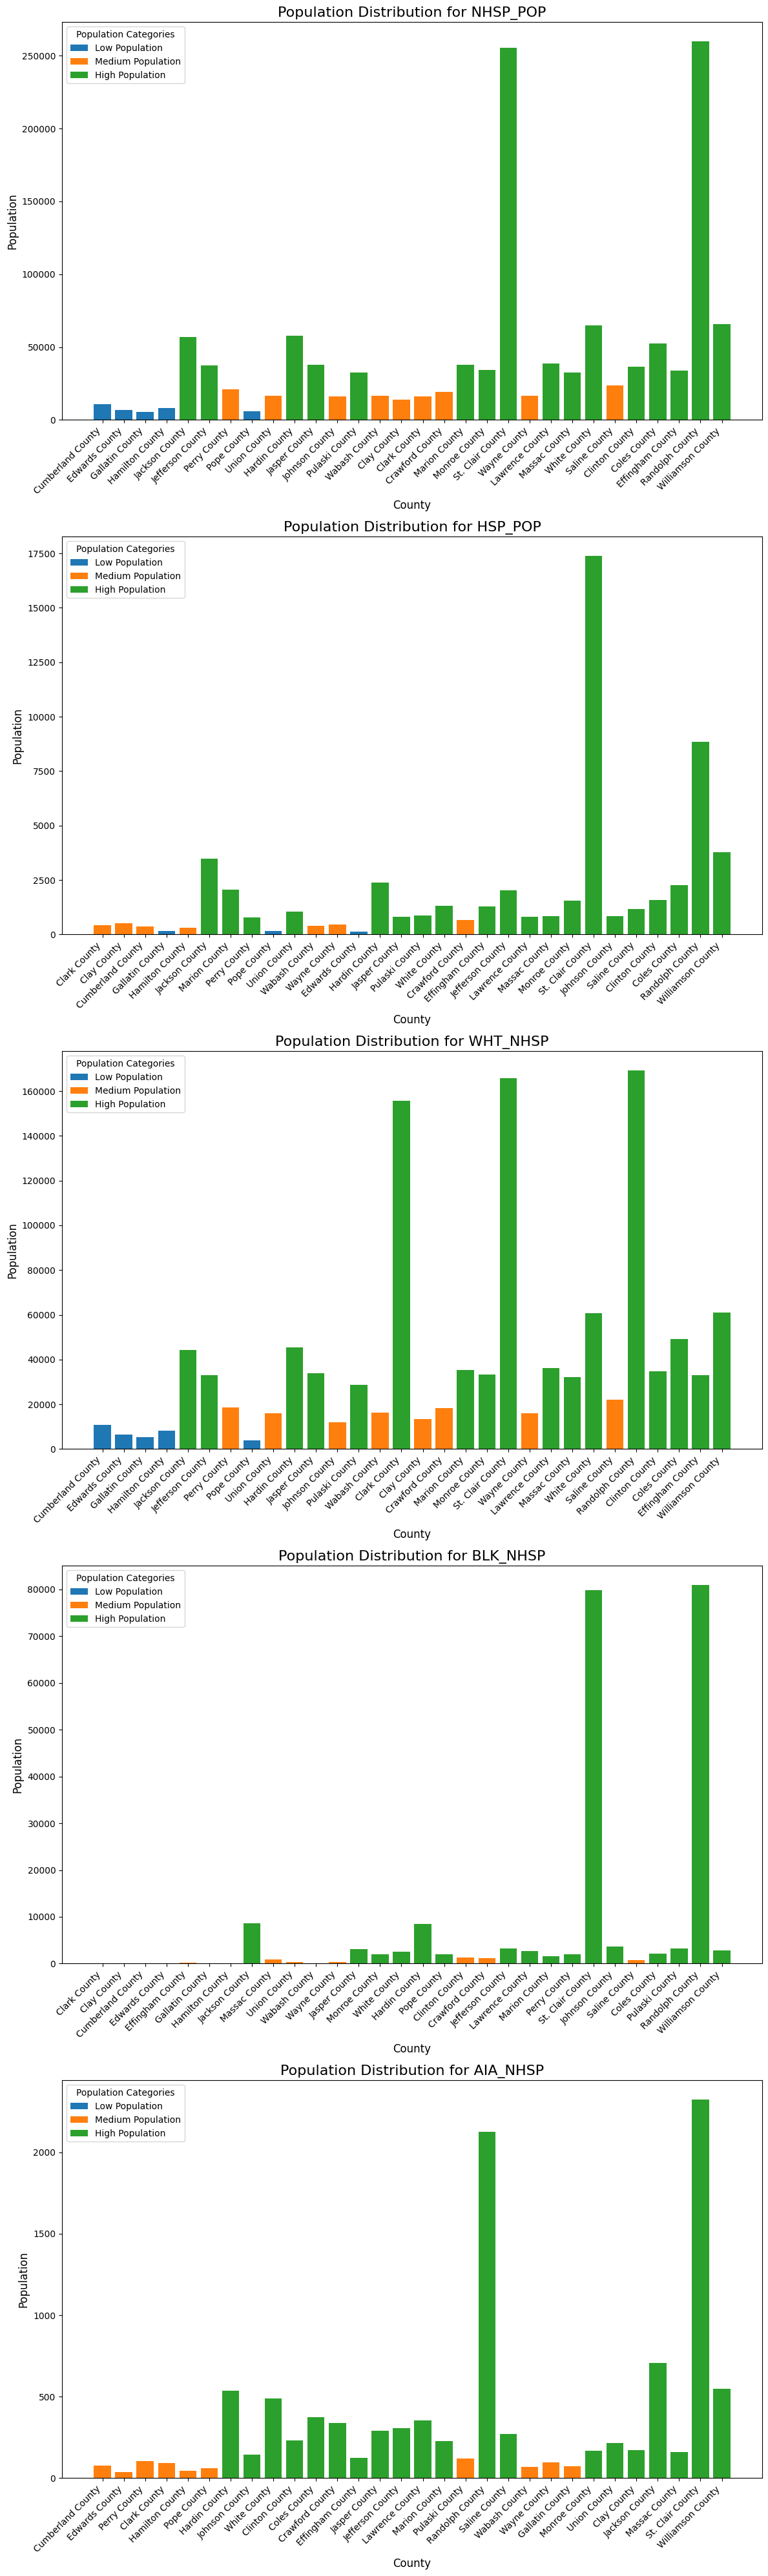

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df_subset' has separate columns for different race categories
df_subset = df[['COUNTY','NHSP_POP','HSP_POP','WHT_NHSP','BLK_NHSP','AIA_NHSP']]  # List of race categories columns
race_columns = df_subset.columns[1:]

# Function to categorize population ranges (adjust based on the actual data)
def categorize_population(df, race):
    # Define population thresholds for categories (these are just example values)
    low_threshold = df[race].quantile(0.33)
    high_threshold = df[race].quantile(0.66)

    # Categorize population as 'Low', 'Medium', 'High' based on thresholds
    df['Population_Category'] = pd.cut(df[race], bins=[0, low_threshold, high_threshold, df[race].max()],
                                       labels=['Low', 'Medium', 'High'])
    return df

# Set up subplots: One plot per race category
n_races = len(race_columns)
fig, axes = plt.subplots(n_races, 1, figsize=(12, 8 * n_races))  # Adjust figsize based on number of races

# If there's only one race category, axes will be a single axis, not a list
if n_races == 1:
    axes = [axes]

# Iterate through each race category and plot the bar chart
for i, race in enumerate(race_columns):
    ax = axes[i]  # Select the subplot

    # Categorize counties based on population for the current race category
    df_race = categorize_population(df_subset, race)

    # Plot each category of population in a separate bar plot
    for category in ['Low', 'Medium', 'High']:
        df_category = df_race[df_race['Population_Category'] == category]
        ax.bar(df_category['COUNTY'], df_category[race], label=f'{category} Population', width=0.8)

    # Add labels and title
    ax.set_title(f'Population Distribution for {race}', fontsize=16)
    ax.set_xlabel('County', fontsize=12)
    ax.set_ylabel('Population', fontsize=12)

    # Rotate x-axis labels and adjust layout
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.legend(title='Population Categories', loc='upper left')

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()



# Model preparation

In [34]:
# Drop the specified columns from the DataFrame
df_CWINNER = df.drop(columns=['PREP_TOT_VOT', 'PDEM_TOT_VOT', 'PWINNER'])

# Drop rows where the year is 2019 or 2021
df_CWINNER = df_CWINNER[~df_CWINNER['Year'].isin([2019,2021])]

# Display the new DataFrame
print(df_CWINNER.head())  # Show first few rows to verify



   Year  GEOID  STATEID           COUNTY  COUNTYID  TOT_POP  NHSP_POP  \
0  2014  17023       17     Clark County         1    16353     16172   
1  2014  17025       17      Clay County         2    13828     13767   
2  2014  17027       17   Clinton County         3    37793     36744   
3  2014  17029       17     Coles County         4    53683     52520   
4  2014  17033       17  Crawford County         5    19777     19406   

   HSP_POP  WHT_NHSP  BLK_NHSP  ...  MEDN_INC  MALE_POP  FEMALE_POP  TOT_CVAP  \
0      181     15926        64  ...     49275      7671         886     12480   
1       61     13404        86  ...     46535      6492         704     10530   
2     1049     34797      1286  ...     64697     17982        2040     29090   
3     1163     49208      1963  ...     39265     23782        2530     43410   
4      371     18175       569  ...     47934      9053        1007     15535   

   BPV_CVAP  APV_CVAP  TOT_VOT_REG  CREP_TOT_VOTE  CDEM_TOT_VOTE     CWINN

In [35]:
# Create the new columns for CWINNER where 'Republican' = 1 and 'Democrat' = 0
df_CWINNER['CWINNER_Republican'] = df_CWINNER['CWINNER'].apply(lambda x: 1 if x == 'Republic' else 0)

In [36]:
print(df_CWINNER.head())

   Year  GEOID  STATEID           COUNTY  COUNTYID  TOT_POP  NHSP_POP  \
0  2014  17023       17     Clark County         1    16353     16172   
1  2014  17025       17      Clay County         2    13828     13767   
2  2014  17027       17   Clinton County         3    37793     36744   
3  2014  17029       17     Coles County         4    53683     52520   
4  2014  17033       17  Crawford County         5    19777     19406   

   HSP_POP  WHT_NHSP  BLK_NHSP  ...  MALE_POP  FEMALE_POP  TOT_CVAP  BPV_CVAP  \
0      181     15926        64  ...      7671         886     12480      2574   
1       61     13404        86  ...      6492         704     10530      1735   
2     1049     34797      1286  ...     17982        2040     29090      3043   
3     1163     49208      1963  ...     23782        2530     43410      9480   
4      371     18175       569  ...      9053        1007     15535      2195   

   APV_CVAP  TOT_VOT_REG  CREP_TOT_VOTE  CDEM_TOT_VOTE     CWINNER  \
0   

In [37]:
# Drop the original PWINNER CoUNTY COUNTYID columns after adding the binary columns
df_CWINNER = df_CWINNER.drop(columns=['COUNTY', 'COUNTYID', 'GEOID', 'STATEID','CWINNER'])


In [38]:
df_CWINNER.describe().columns

Index(['Year', 'TOT_POP', 'NHSP_POP', 'HSP_POP', 'WHT_NHSP', 'BLK_NHSP',
       'AIA_NHSP', 'ASN_NHSP', 'MEDN_INC', 'MALE_POP', 'FEMALE_POP',
       'TOT_CVAP', 'BPV_CVAP', 'APV_CVAP', 'TOT_VOT_REG', 'CREP_TOT_VOTE',
       'CDEM_TOT_VOTE', 'CWINNER_Republican'],
      dtype='object')

In [39]:
# Splitting into train and test datasets based on the 'year' column
train_data = df_CWINNER[df_CWINNER['Year'] != 2022]
test_data = df_CWINNER[df_CWINNER['Year'] == 2022]

In [40]:
print(train_data['Year'].unique())

[2014 2016 2018 2020]


In [41]:
print(test_data['Year'].unique())

[2022]


In [42]:
# Select features
X_train = train_data.drop(columns=['Year'])
X_test = test_data.drop(columns=['Year'])


In [43]:
# ---------------------------------
# MODELING FOR CWINNER
# ---------------------------------
#target column
y_train_cwinner = train_data['CWINNER_Republican']
y_test_cwinner = test_data['CWINNER_Republican']


In [44]:
# df_CWINNER = df_CWINNER.drop(columns=['CWINNER'])

# Logistic Regression

In [45]:
# Check for any non-numeric values in the DataFrame
non_numeric_cols = X_train.columns[X_train.dtypes != 'number']
print(non_numeric_cols)


Index(['TOT_POP', 'NHSP_POP', 'HSP_POP', 'WHT_NHSP', 'BLK_NHSP', 'AIA_NHSP',
       'ASN_NHSP', 'MEDN_INC', 'MALE_POP', 'FEMALE_POP', 'TOT_CVAP',
       'BPV_CVAP', 'APV_CVAP', 'TOT_VOT_REG', 'CREP_TOT_VOTE', 'CDEM_TOT_VOTE',
       'CWINNER_Republican'],
      dtype='object')


In [46]:
# Convert all columns to numeric, forcing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')

# Check for any NaN values in the DataFrame
print(X_train.isna().sum())


TOT_POP               0
NHSP_POP              0
HSP_POP               0
WHT_NHSP              0
BLK_NHSP              0
AIA_NHSP              0
ASN_NHSP              0
MEDN_INC              0
MALE_POP              0
FEMALE_POP            0
TOT_CVAP              0
BPV_CVAP              0
APV_CVAP              0
TOT_VOT_REG           0
CREP_TOT_VOTE         0
CDEM_TOT_VOTE         0
CWINNER_Republican    0
dtype: int64


In [47]:
# # normal Logistic Regression for PWINNER
log_reg_cwinner = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg_cwinner.fit(X_train, y_train_cwinner)



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [48]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np

# Initialize StratifiedKFold for cross-validation with 5 splits
cv = StratifiedKFold(n_splits=5)

# Lists to store precision, recall, F1-score, and accuracy for each fold
precisions = []
recalls = []
f1_scores = []
accuracies = []

# Loop through the folds
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train_cwinner), 1):
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train_cwinner.iloc[train_idx], y_train_cwinner.iloc[val_idx]

    # Fit the model on the training data
    log_reg_cwinner.fit(X_train_cv, y_train_cv)

    # Predict on the validation data
    y_pred_cv = log_reg_cwinner.predict(X_val_cv)

    # Calculate precision, recall, and F1-score for this fold
    precision, recall, f1, _ = precision_recall_fscore_support(y_val_cv, y_pred_cv, average='binary')

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_val_cv, y_pred_cv)

    # Append to the lists
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    accuracies.append(accuracy)

# Compute average precision, recall, F1-score, and accuracy across all folds
average_precision = np.mean(precisions)
average_recall = np.mean(recalls)
average_f1_score = np.mean(f1_scores)
average_accuracy = np.mean(accuracies)

# Print overall summary
print("Overall Performance (Average Across All Folds):")
print(f"Average Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-Score: {average_f1_score:.4f}")
print(f"Average Accuracy: {average_accuracy:.4f}")


Overall Performance (Average Across All Folds):
Average Precision: 0.9895
Average Recall: 0.9889
Average F1-Score: 0.9889
Average Accuracy: 0.9833


In [49]:
y_pred_test = log_reg_cwinner.predict(X_test)

# Evaluate the model on the test data
print("Classification Report on Test Data:")
print(classification_report(y_test_cwinner, y_pred_test))

# Confusion Matrix for Test Data
cm_test = confusion_matrix(y_test_cwinner, y_pred_test,labels=[0, 1])
print("Confusion Matrix on Test Data:")
print(cm_test)

# Calculate the accuracy on the test set
accuracy_test = accuracy_score(y_test_cwinner, y_pred_test)
print(f"Test Accuracy: {accuracy_test:.4f}")

Classification Report on Test Data:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix on Test Data:
[[ 0  0]
 [ 0 30]]
Test Accuracy: 1.0000


In [50]:
# Calculate the number of Democrat and Republican wins for the test set
democrat_wins = np.sum(y_pred_test == 0)  # Assuming 0 is Democrat
republican_wins = np.sum(y_pred_test == 1)  # Assuming 1 is Republican

# Calculate the total number of predictions (total instances in test set)
total_test_predictions = len(y_pred_test)

# Calculate the percentage of Democrat and Republican wins in the test set
democrat_percentage_test = (democrat_wins / total_test_predictions) * 100
republican_percentage_test = (republican_wins / total_test_predictions) * 100

# Print the results
print(f"Percentage of Democrat wins in test set (Predicted): {democrat_percentage_test:.2f}%")
print(f"Percentage of Republican wins in test set (Predicted): {republican_percentage_test:.2f}%")


Percentage of Democrat wins in test set (Predicted): 0.00%
Percentage of Republican wins in test set (Predicted): 100.00%


# Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import numpy as np

# Initialize StratifiedKFold for cross-validation with 5 splits
cv = StratifiedKFold(n_splits=5)

# Lists to store precision, recall, F1-score, and accuracy for each fold
precisions_rf = []
recalls_rf = []
f1_scores_rf = []
accuracies_rf = []

# Initialize Random Forest Classifier with additional hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=200,      # Increase the number of estimators
    max_depth=20,          # Set maximum depth to prevent overfitting
    min_samples_split=20,  # Set minimum samples per split for more stable splits
    class_weight='balanced',
    random_state=60
)

# Loop through the folds for cross-validation
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train_cwinner), 1):
    # Split the data for training and validation based on the indices from StratifiedKFold
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train_cwinner.iloc[train_idx], y_train_cwinner.iloc[val_idx]

    # No scaling applied, use the original data
    # Fit the Random Forest model on the training data
    rf_classifier.fit(X_train_cv, y_train_cv)

    # Predict on the validation data
    y_pred_cv_rf = rf_classifier.predict(X_val_cv)

    # Calculate precision, recall, and F1-score for this fold
    precision_rf, recall_rf, f1_rf, _ = precision_recall_fscore_support(y_val_cv, y_pred_cv_rf, average='binary')

    # Calculate accuracy for this fold
    accuracy_rf = accuracy_score(y_val_cv, y_pred_cv_rf)

    # Append to the lists
    precisions_rf.append(precision_rf)
    recalls_rf.append(recall_rf)
    f1_scores_rf.append(f1_rf)
    accuracies_rf.append(accuracy_rf)

# Compute average precision, recall, F1-score, and accuracy across all folds for Random Forest
average_precision_rf = np.mean(precisions_rf)
average_recall_rf = np.mean(recalls_rf)
average_f1_score_rf = np.mean(f1_scores_rf)
average_accuracy_rf = np.mean(accuracies_rf)

# Print overall summary for Random Forest
print("Overall Performance (Average Across All Folds) - Random Forest:")
print(f"Average Precision: {average_precision_rf:.4f}")
print(f"Average Recall: {average_recall_rf:.4f}")
print(f"Average F1-Score: {average_f1_score_rf:.4f}")
print(f"Average Accuracy: {average_accuracy_rf:.4f}")


Overall Performance (Average Across All Folds) - Random Forest:
Average Precision: 0.9889
Average Recall: 1.0000
Average F1-Score: 0.9943
Average Accuracy: 0.9913


Test Set Performance (Random Forest):
Test Precision: 1.0000
Test Recall: 1.0000
Test F1-Score: 1.0000
Test Accuracy: 1.0000
Confusion Matrix for Test Set (Random Forest):
[[ 0  0]
 [ 0 30]]
Classification Report for Test Set (Random Forest):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



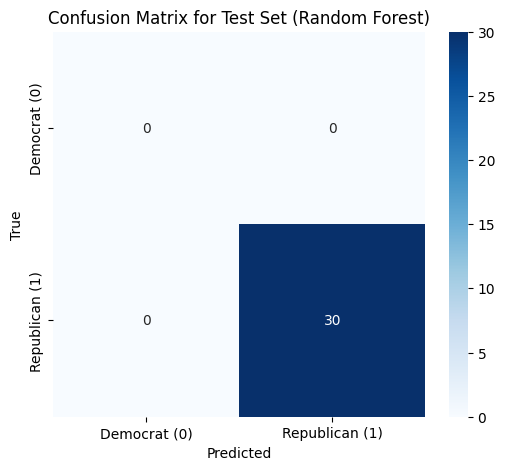

Percentage of Democrat wins (Predicted): 0.00%
Percentage of Republican wins (Predicted): 100.00%


In [52]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Now, make predictions on the test set using the trained model (no scaling)
y_pred_test_rf = rf_classifier.predict(X_test)  # Predict on the test set directly

# Calculate precision, recall, F1-score, and accuracy for the test set
precision_test_rf, recall_test_rf, f1_test_rf, _ = precision_recall_fscore_support(y_test_cwinner, y_pred_test_rf, average='binary')
accuracy_test_rf = accuracy_score(y_test_cwinner, y_pred_test_rf)

# Print test set performance
print("Test Set Performance (Random Forest):")
print(f"Test Precision: {precision_test_rf:.4f}")
print(f"Test Recall: {recall_test_rf:.4f}")
print(f"Test F1-Score: {f1_test_rf:.4f}")
print(f"Test Accuracy: {accuracy_test_rf:.4f}")

# Confusion Matrix for Test Set
cm_test_rf = confusion_matrix(y_test_cwinner, y_pred_test_rf,labels=[0, 1])
print("Confusion Matrix for Test Set (Random Forest):")
print(cm_test_rf)

# Classification Report for Test Set
print("Classification Report for Test Set (Random Forest):")
print(classification_report(y_test_cwinner, y_pred_test_rf))

# Plot the confusion matrix as a heatmap for the test set
plt.figure(figsize=(6, 5))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Democrat (0)', 'Republican (1)'], yticklabels=['Democrat (0)', 'Republican (1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Test Set (Random Forest)')
plt.show()

# Calculate the percentage of predicted Democrat and Republican wins in the test set
democrat_wins_rf = np.sum(y_pred_test_rf == 0)
republican_wins_rf = np.sum(y_pred_test_rf == 1)

# Calculate percentage of wins
democrat_percentage_rf = (democrat_wins_rf / len(y_pred_test_rf)) * 100
republican_percentage_rf = (republican_wins_rf / len(y_pred_test_rf)) * 100

# Print percentages for Democrat and Republican wins in the test set
print(f"Percentage of Democrat wins (Predicted): {democrat_percentage_rf:.2f}%")
print(f"Percentage of Republican wins (Predicted): {republican_percentage_rf:.2f}%")


# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [54]:
# Initialize the KNN model (you can adjust n_neighbors and other parameters)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train_cwinner)

# Make predictions on the test set
y_pred_cwinner = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_cwinner, y_pred_cwinner)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test_cwinner, y_pred_cwinner))
print('Confusion Matrix:')
print(confusion_matrix(y_test_cwinner, y_pred_cwinner,labels=[0, 1]))

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[ 0  0]
 [ 0 30]]


In [55]:
# Calculate the percentage of Republican predictions (i.e., y_pred_pwinner == 1)
republican_predictions = np.sum(y_pred_cwinner == 1) / len(y_pred_cwinner) * 100

# Calculate the percentage of Democrat predictions (i.e., y_pred_pwinner == 0)
democrat_predictions = 100 - republican_predictions  # Since only two classes (Republican and Democrat)

# Print the predicted percentages
print(f"Percentage of Republican wins in test set (Predicted) - KNN: {republican_predictions:.2f}%")
print(f"Percentage of Democrat wins in test set (Predicted) - KNN: {democrat_predictions:.2f}%")


Percentage of Republican wins in test set (Predicted) - KNN: 100.00%
Percentage of Democrat wins in test set (Predicted) - KNN: 0.00%


# Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Accuracy for PWINNER (Naive Bayes): 0.8000


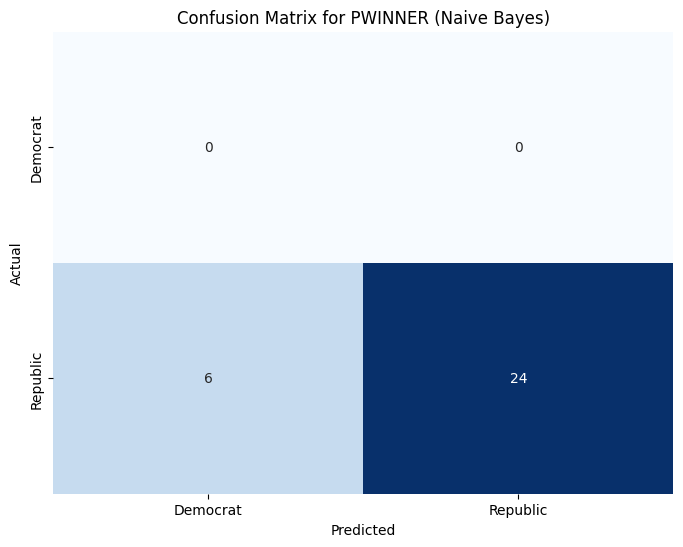

In [57]:
# 2. Naive Bayes for PWINNER (Gaussian Naive Bayes)
nb_cwinner = GaussianNB()
nb_cwinner.fit(X_train, y_train_cwinner)

# Predict the values for PWINNER
y_pred_nb_cwinner = nb_cwinner.predict(X_test)

# Evaluate the model for PWINNER
accuracy_cwinner = accuracy_score(y_test_cwinner, y_pred_nb_cwinner)
print(f'Accuracy for PWINNER (Naive Bayes): {accuracy_cwinner:.4f}')

# Confusion matrix for PWINNER
cm_cwinner = confusion_matrix(y_test_cwinner, y_pred_nb_cwinner)

# Plot confusion matrix for PWINNER
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cwinner, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Democrat', 'Republic'], yticklabels=['Democrat', 'Republic'])
plt.title('Confusion Matrix for PWINNER (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [58]:
# Calculate the predicted percentages for each class (Democrat and Republican)
republican_predictions_nb = np.sum(y_pred_nb_cwinner == 1) / len(y_pred_nb_cwinner) * 100
democrat_predictions_nb = 100 - republican_predictions_nb  # Since only two classes (Republican and Democrat)

# Print the predicted percentages for Naive Bayes model
print(f"Percentage of Republican wins in test set (Predicted) - Naive Bayes: {republican_predictions_nb:.2f}%")
print(f"Percentage of Democrat wins in test set (Predicted) - Naive Bayes: {democrat_predictions_nb:.2f}%")

Percentage of Republican wins in test set (Predicted) - Naive Bayes: 80.00%
Percentage of Democrat wins in test set (Predicted) - Naive Bayes: 20.00%


# Congressional Election Voter Turnout

In [59]:
voter_df = pd.DataFrame(df)

# Calculate voter turnout
voter_df['voter_turnout'] = ((voter_df['CREP_TOT_VOTE'] + voter_df['CDEM_TOT_VOTE']) / voter_df['TOT_VOT_REG']) * 100

# Group by Year and CountyID to get average voter turnout per county per year
df_grouped = voter_df.groupby(['Year', 'COUNTYID']).agg({'voter_turnout': 'mean'}).reset_index()

# Replace NaN values with 0 for voter turnout
df_grouped['voter_turnout'] = df_grouped['voter_turnout'].fillna(0)

print(df_grouped)

     Year  COUNTYID  voter_turnout
0    2014         1      78.254289
1    2014         2      88.692913
2    2014         3      29.257090
3    2014         4      31.259720
4    2014         5      53.162236
..    ...       ...            ...
203  2022        26      62.268026
204  2022        27      60.720491
205  2022        28      65.964912
206  2022        29      64.721536
207  2022        30      65.254610

[208 rows x 3 columns]


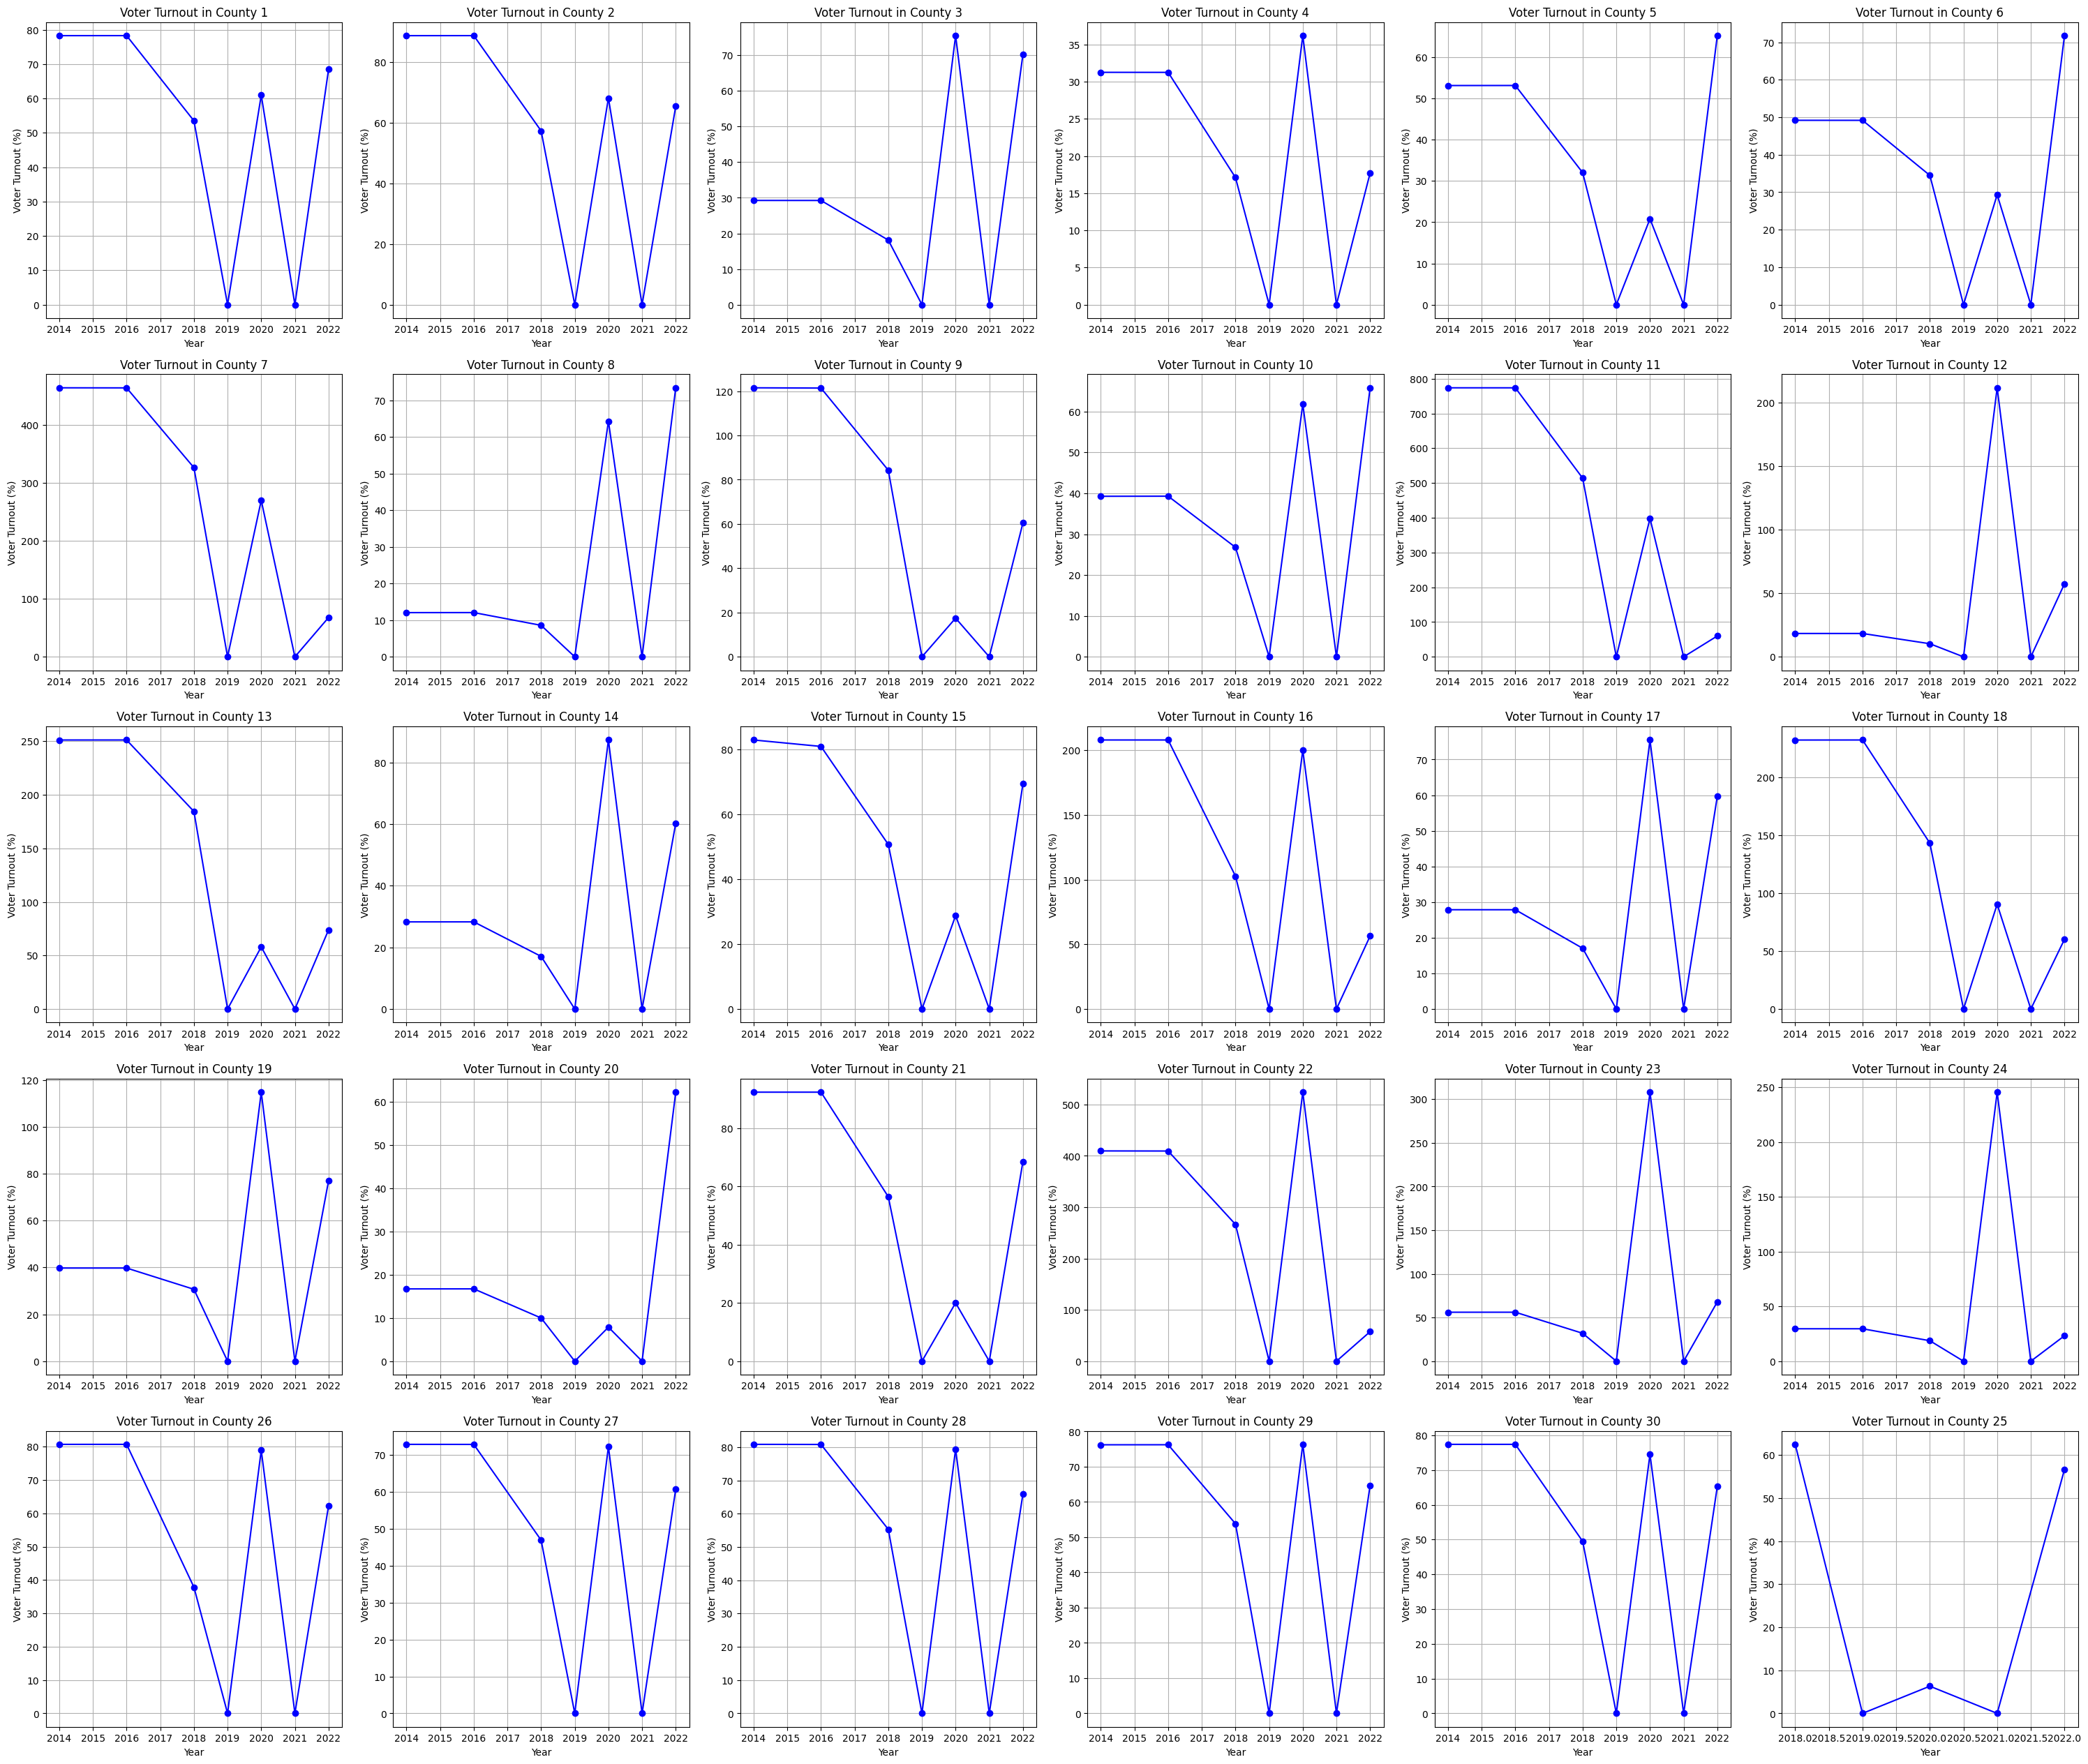

In [60]:
# List of unique counties in the dataset
counties = df_grouped['COUNTYID'].unique()


# Create a figure for multiple subplots
plt.figure(figsize=(30, 30))

# Create a plot for each county
for i, county in enumerate(counties, 1):
    # Filter data for the specific county
    county_data = df_grouped[df_grouped['COUNTYID'] == county]

    # Create subplot for each county
    plt.subplot(6, 6, i)  # Adjust the number of rows and columns as needed
    plt.plot(county_data['Year'], county_data['voter_turnout'], marker='o', linestyle='-', color='b')
    plt.title(f'Voter Turnout in County {county}')
    plt.xlabel('Year')
    plt.ylabel('Voter Turnout (%)')
    plt.grid(True)

# Adjust the layout for better presentation
plt.tight_layout()
plt.show()


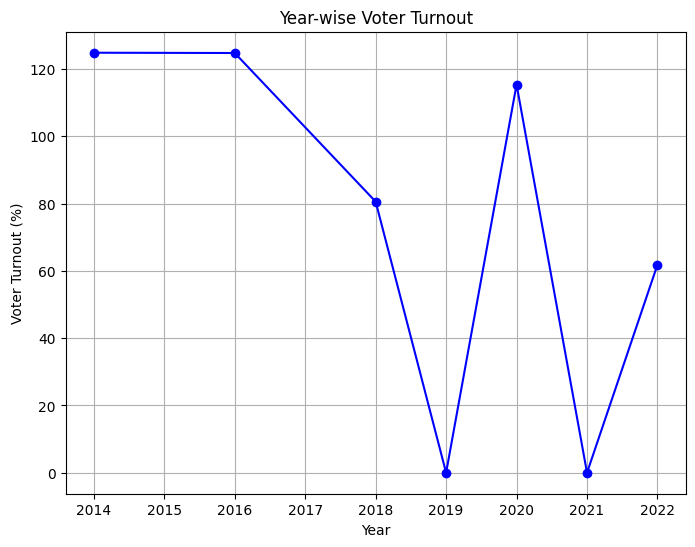

   Year  voter_turnout
0  2014     124.859504
1  2016     124.777676
2  2018      80.592498
3  2019       0.000000
4  2020     115.397330
5  2021       0.000000
6  2022      61.845351


In [61]:
# Group by Year to get the average voter turnout per year across all counties
df_yearly = voter_df.groupby('Year').agg({'voter_turnout': 'mean'}).reset_index()

# Replace NaN values with 0 for voter turnout
df_yearly['voter_turnout'] = df_yearly['voter_turnout'].fillna(0)

# Plot voter turnout by year
plt.figure(figsize=(8, 6))
plt.plot(df_yearly['Year'], df_yearly['voter_turnout'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Year-wise Voter Turnout')
plt.xlabel('Year')
plt.ylabel('Voter Turnout (%)')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# Display the year-wise voter turnout
print(df_yearly)


# Presidential Election Voter Turnout

In [62]:
p_voter_df = pd.DataFrame(df)

# Calculate voter turnout
p_voter_df['voter_turnout'] = ((p_voter_df['PREP_TOT_VOT'] + p_voter_df['PDEM_TOT_VOT']) / p_voter_df['TOT_VOT_REG']) * 100

# Group by Year and CountyID to get average voter turnout per county per year
df_grouped = p_voter_df.groupby(['Year', 'COUNTYID']).agg({'voter_turnout': 'mean'}).reset_index()

# Replace NaN values with 0 for voter turnout
df_grouped['voter_turnout'] = df_grouped['voter_turnout'].fillna(0)

print(df_grouped)

     Year  COUNTYID  voter_turnout
0    2014         1       0.000000
1    2014         2       0.000000
2    2014         3       0.000000
3    2014         4       0.000000
4    2014         5       0.000000
..    ...       ...            ...
203  2022        26      61.720414
204  2022        27      61.230163
205  2022        28      66.601387
206  2022        29      66.280175
207  2022        30      64.934597

[208 rows x 3 columns]


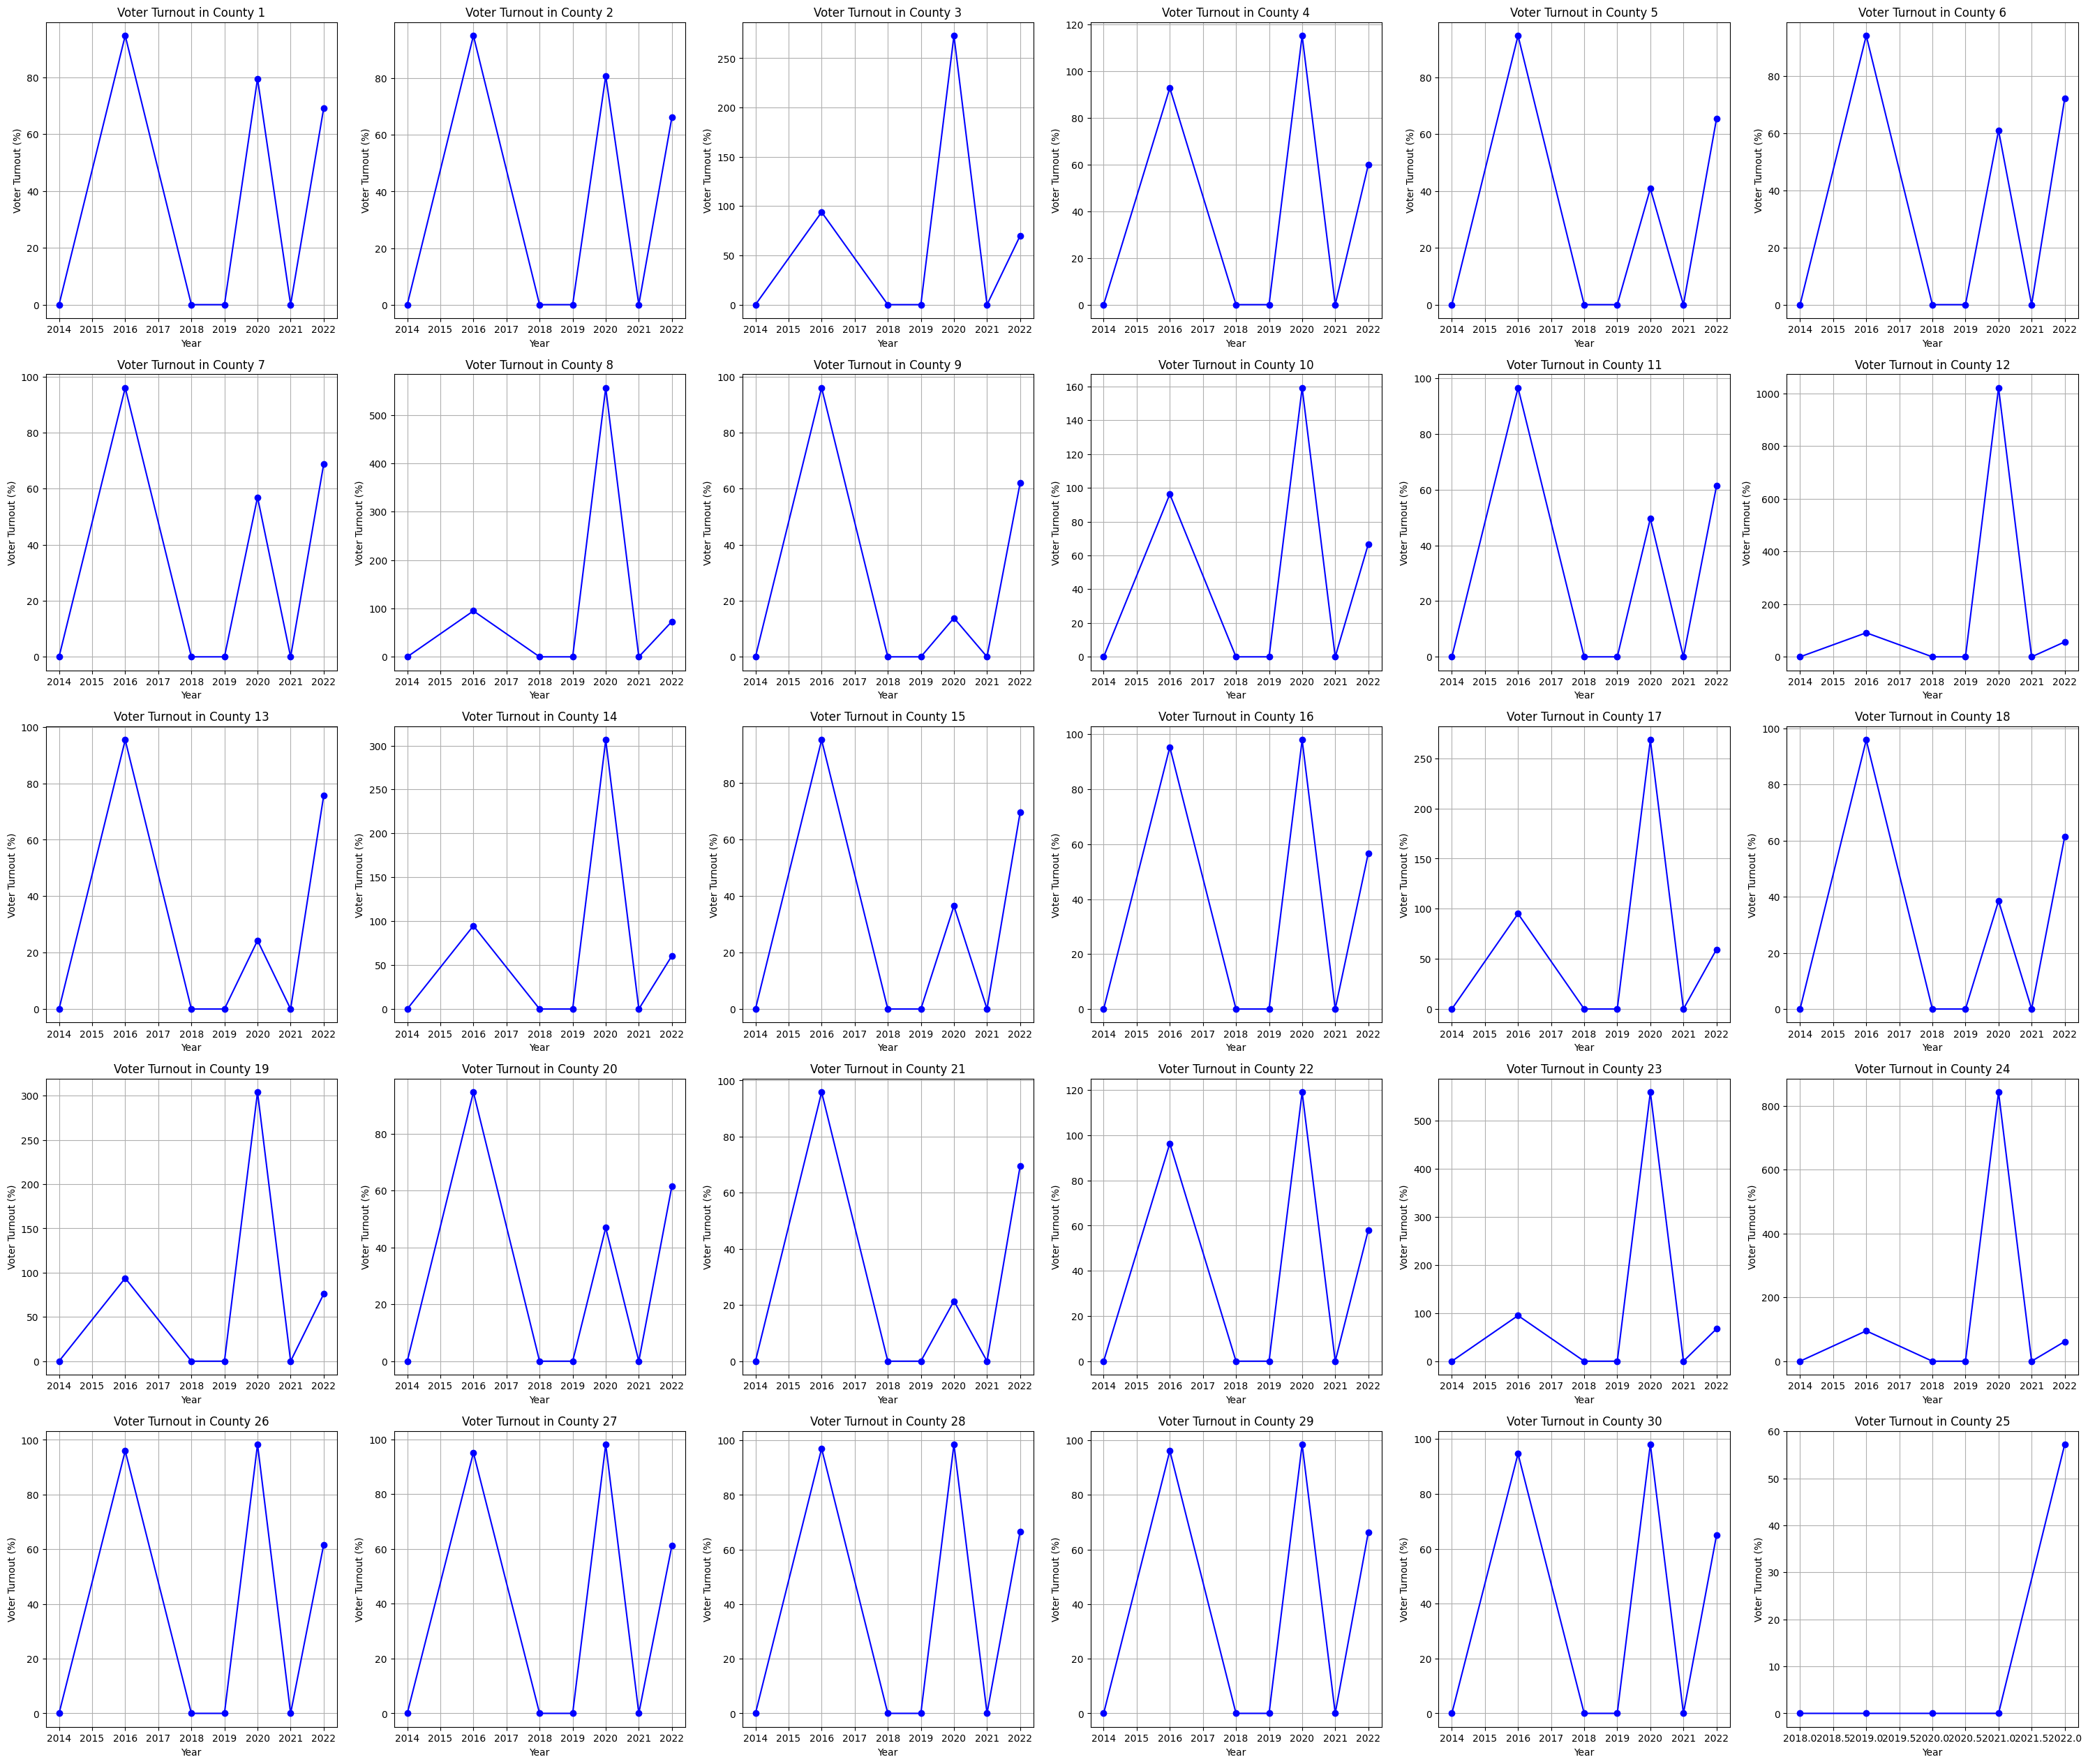

In [63]:
# List of unique counties in the dataset
counties = df_grouped['COUNTYID'].unique()

# Create a figure for multiple subplots
plt.figure(figsize=(30, 30))

# Create a plot for each county
for i, county in enumerate(counties, 1):
    # Filter data for the specific county
    county_data = df_grouped[df_grouped['COUNTYID'] == county]

    # Create subplot for each county
    plt.subplot(6, 6, i)  # Adjust the number of rows and columns as needed
    plt.plot(county_data['Year'], county_data['voter_turnout'], marker='o', linestyle='-', color='b')
    plt.title(f'Voter Turnout in County {county}')
    plt.xlabel('Year')
    plt.ylabel('Voter Turnout (%)')
    plt.grid(True)

# Adjust the layout for better presentation
plt.tight_layout()
plt.show()


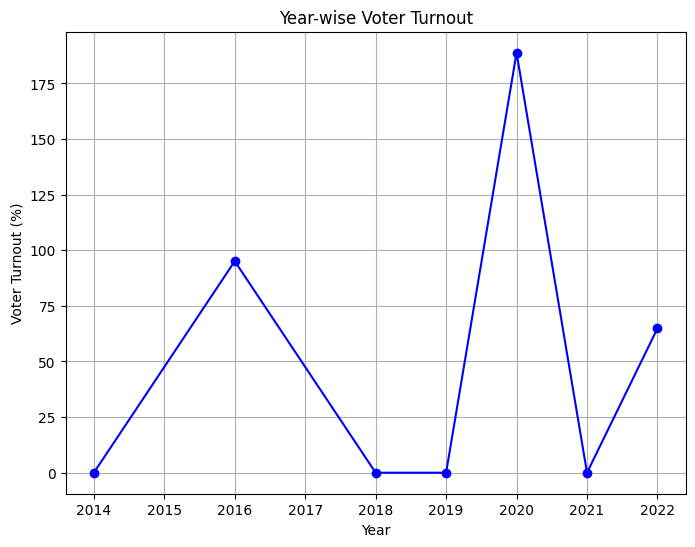

   Year  voter_turnout
0  2014       0.000000
1  2016      95.079766
2  2018       0.000000
3  2019       0.000000
4  2020     188.788973
5  2021       0.000000
6  2022      64.890465


In [64]:
# Group by Year to get the average voter turnout per year across all counties
df_yearly = p_voter_df.groupby('Year').agg({'voter_turnout': 'mean'}).reset_index()

# Replace NaN values with 0 for voter turnout
df_yearly['voter_turnout'] = df_yearly['voter_turnout'].fillna(0)

# Plot voter turnout by year
plt.figure(figsize=(8, 6))
plt.plot(df_yearly['Year'], df_yearly['voter_turnout'], marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Year-wise Voter Turnout')
plt.xlabel('Year')
plt.ylabel('Voter Turnout (%)')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

# Display the year-wise voter turnout
print(df_yearly)
